Continuação do jupyter anterior. 

        01-Perceptron-iris.ipynb
        
----------------------------------------------------------------------------------------------------------------


Breve descrição:

O problema que resolveremos com o perceptron envolve a classificação das espécies de íris com base em suas características morfológicas. Especificamente, usaremos o perceptron para distinguir entre duas das três espécies de íris no dataset. 

No jupyter anterior usamos a biblioteca numpy para criar do zero um perceptron. Agora iremos utizar alguns ferramenta mais sofistica que iram faciliar todo o processo. 

* 1 - Aprendendo a criar um classe no numpy 

*  * 1.1 - Como criar um classe perceptron.
*  * 1.2 - treinando o perceptron.

*  2 - Introdução a bilbioteca Pytorch.
*  * 2.1 - Aprendendo a criar um perceptron.
*  * 2.2 - Como treinar um perceptron.
*  * 2.3 - Como Treinar utilizando a GPU.



# 1 - Aprendendo a criar um classe no numpy 

## 1.0 Para quem não sabe oque é classe ou programação orientada a objeto.

Introdução às Classes em Python

Python é uma linguagem de programação orientada a objetos, o que significa que ela suporta o uso de classes para organizar código em componentes reutilizáveis. Uma classe é como um blueprint para criar objetos; um objeto é uma instância de uma classe. Com classes, podemos modelar dados e funcionalidades complexas de maneira intuitiva e acessível.

```python
*Definindo uma Classe*

    Uma classe é definida usando a palavra-chave class, seguida pelo nome da classe e dois pontos. Dentro da classe, definimos funções que são chamadas de métodos. O método `__init__()` é especial: ele é o construtor da classe e é chamado automaticamente quando um novo objeto da classe é criado.


class Carro:
    def __init__(self, marca, modelo, ano):
        self.marca = marca
        self.modelo = modelo
        self.ano = ano

Neste exemplo, Carro é uma classe com um método __init__() que inicializa três atributos: marca, modelo e ano. A palavra self é uma referência à instância atual da classe e é usada para acessar variáveis que pertencem à classe. Para criar uma instância de uma classe, você chama a classe usando o nome da classe seguido por parênteses, passando os argumentos que o método __init__() aceita:

*Criando a instância:*

meu_carro = Carro('Ford', 'Mustang', 2020)

Aqui, meu_carro é um objeto da classe Carro. Podemos adicionar outros métodos à classe para definir comportamentos adicionais:

class Carro:
    def __init__(self, marca, modelo, ano):
        self.marca = marca
        self.modelo = modelo
        self.ano = ano

    def descricao(self):
        return f"{self.ano} {self.marca} {self.modelo}"

    def idade(self, ano_atual):
        return ano_atual - self.ano

Agora, a classe Carro tem dois métodos adicionais: descricao() que retorna uma string descrevendo o carro, e idade(), que calcula a idade do carro.


*Herança:* permite que uma classe herde atributos e métodos de outra classe. Isso é útil para criar subcategorias que compartilham funcionalidades comuns.

class CarroEletrico(Carro):
    def __init__(self, marca, modelo, ano, autonomia):
        super().__init__(marca, modelo, ano)
        self.autonomia = autonomia

    def descricao_bateria(self):
        return f"Este carro tem uma autonomia de {self.autonomia} km após uma carga completa."


A classe 'CarroEletrico' herda de 'Carro' e adiciona um novo atributo autonomia, além de um novo método para descrever a bateria. Note que nesse caso temos 'super().__init__( .... )' este comando nos permite utilizar os metodos definido na class Carro().

## 1.1 - Como criar um classe perceptron.

In [1]:
# Importação das bibliotecas necessárias
import numpy as np  # Biblioteca para operações numéricas em arrays e matrizes
import matplotlib.pyplot as plt  # Biblioteca para criação de gráficos e visualizações

from sklearn import datasets 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
class Perceptron:
    def __init__(self,Entrada):
        self.input = Entrada

        # Inicialização dos pesos e bias
        self.weights = np.random.randn(Entrada.shape[1])
        self.bias = np.random.randn(1)

    def pegar_pesos_bias(self):
        return self.weights,self.bias


Criamos um classe chamada perceptron que criar os pesos e bias. Também definimos um metodo que devolve quais são os pesos e bias.

In [3]:
#x = np.array( [[0,1,2,3]])
x = np.ones((10,4))
neuronio = Perceptron(x)
neuronio

In [4]:
neuronio.pegar_pesos_bias()

(array([-0.99304466,  0.03144385, -0.38118553, -0.08028247]),
 array([0.67269197]))

No jupyter anterior, nos aprendendo que o perceptron tem varias outras funções.

Iremos implementar as outras partes como metodos dentro da clalsse perceptron

In [5]:
class Perceptron:
    def __init__(self, Entrada):
        """
        Inicializa o perceptron com entradas, pesos aleatórios e bias.
        """
        self.weights = np.random.randn(Entrada.shape[1])  # pesos inicializados aleatoriamente
        self.bias = np.random.randn(1)  # bias inicializado aleatoriamente

    def pegar_pesos_bias(self):
        """
        Retorna os pesos e bias do perceptron.
        """
        return self.weights, self.bias
    
    def sigmoid(self, z_):
        """
        Função de Ativação Sigmóide.
        """
        return 1 / (1 + np.exp(-z_))
    
    def forward(self,x_):
        """
        Realiza a propagação direta (forward pass) através de um perceptron simples.
        """
        # Aplicação da função sigmoid para obter a probabilidade. 
        return self.sigmoid(np.dot(x_, self.weights) + self.bias ) 
        
    def derivada_sigmoid(self, s_):
        """
        Derivada da Função Sigmóide.
        """
        return s_ * (1 - s_)
    

    def derivada_erro_quadratico_medio(self,y_pred, y_true):
        """
        Derivada do Erro Quadrático Médio.

        """
        return 2 * (y_pred - y_true) / y_true.size
    
    def backpropagation(self,x_,y_ ,y_pred, learning_rate):
        """
        Algoritmo de Backpropagation.

        """
        # Derivada do erro
        d_error = self.derivada_erro_quadratico_medio(y_pred, y_)
        
        # Derivadas da função de ativação
        d_sigmoid = self.derivada_sigmoid(y_pred)
        
        # Gradientes
        d_weights = np.dot(x_.T, d_error * d_sigmoid)
        #d_weights = np.dot(x_, (d_error * d_sigmoid))  # Remove a transposta se x_ já estiver no formato correto
        d_bias = np.sum(d_error * d_sigmoid)
  
        # Atualização dos pesos e bias
        self.weights -= learning_rate * d_weights
        self.bias -= learning_rate * d_bias

def erro_quadratico_medio(y_pred, y_true):
    """
    Calcula o Erro Quadrático Médio (Mean Squared Error, MSE).
    """
    return np.mean((y_pred - y_true) ** 2)

def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plota o limite de decisão para um modelo de classificação binária junto com os dados de entrada.
    
    """
    # Definir os limites do gráfico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predizer para cada ponto no meshgrid
    Z = neuronio.sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias)
    Z = Z.reshape(xx.shape)
    
    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')

In [6]:
# Carregar o dataset Iris
iris = datasets.load_iris() 
X = iris.data 
y = iris.target 

# Traduzir os nomes das colunas
iris.feature_names = ['comprimento da sépala',
                      'largura da sépala',
                      'comprimento da pétala',
                      'largura da pétala']

# Filtrar para obter apenas as classes 0 e 2
indices = np.where((y == 0) | (y == 2))  # Localiza índices das classes 0 e 2
X = X[indices] 
y = y[indices] 

y = np.where(y == 2, 1, 0)  # Re-codificar classe 2 como 1, classe 0 permanece 0

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Normalização dos dados para melhor desempenho do modelo
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 


# Instanciando a classe Perceptron
neuronio = Perceptron(Entrada=X_train)
neuronio

In [7]:
neuronio.pegar_pesos_bias() # Pesos criados

(array([ 0.56662226,  0.19267951, -0.09291743,  0.75124926]),
 array([1.33899717]))

In [8]:
y_pred = neuronio.forward(X_train) 
y_pred

array([0.94751347, 0.85782684, 0.59910054, 0.45272302, 0.76382004,
       0.78186097, 0.59383026, 0.85972269, 0.49117455, 0.94119938,
       0.53057785, 0.4805824 , 0.95836973, 0.59001766, 0.93785678,
       0.70299672, 0.88669519, 0.92469166, 0.54087474, 0.70666742,
       0.55016873, 0.51153139, 0.56051473, 0.93048897, 0.6001133 ,
       0.63832878, 0.96661553, 0.51339703, 0.92246367, 0.39816917,
       0.52728068, 0.46793648, 0.60673284, 0.42989141, 0.4175072 ,
       0.895343  , 0.52406874, 0.88733094, 0.64320986, 0.92990365,
       0.70214494, 0.84889179, 0.91450644, 0.64814768, 0.93264155,
       0.96767263, 0.61828321, 0.94862581, 0.87550805, 0.90322046,
       0.90793052, 0.38536544, 0.87314018, 0.63569904, 0.92270655,
       0.91992482, 0.92657976, 0.64619537, 0.94654497, 0.96395246,
       0.82423383, 0.78738934, 0.54999605, 0.49291461, 0.50105873,
       0.93296929, 0.64639888, 0.49622246, 0.62025369, 0.88549633,
       0.94054958, 0.9274539 , 0.93153476, 0.90273219, 0.61471

In [9]:
neuronio.backpropagation(X_train, y_train, y_pred, learning_rate=0.01)
neuronio.pegar_pesos_bias()# Novos pesos e bias.

(array([ 0.56771484,  0.19178908, -0.09153197,  0.75262172]),
 array([1.33785488]))

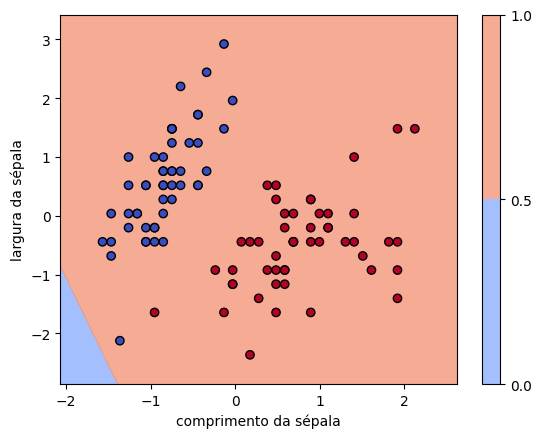

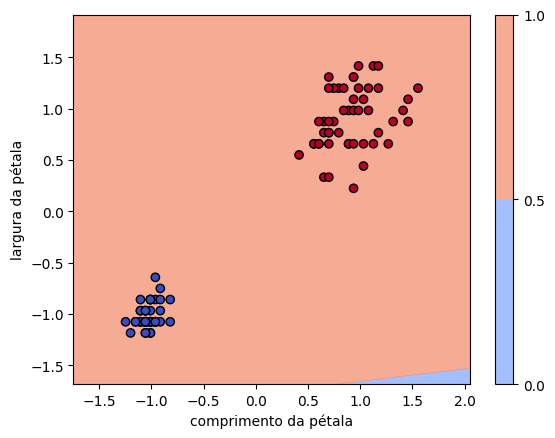

In [10]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.

model_weights = np.array([ weights[0][0],  weights[0][1]])  
model_bias = weights[-1]                  
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[0][2],  weights[0][3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

## 1.2 - treinando o perceptron.

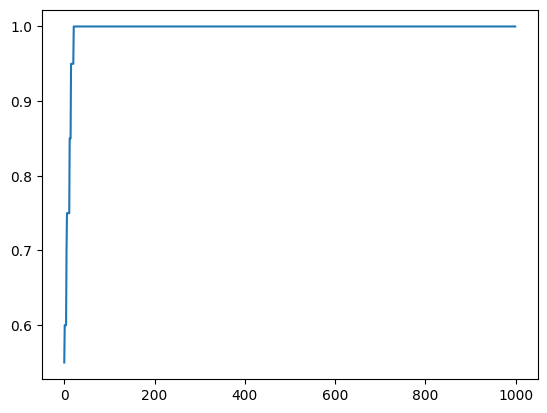

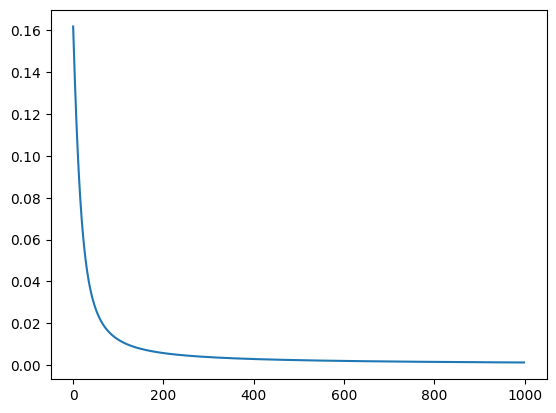

In [11]:

Loss_acuracia = []
Loss_mse = []

# Treinamento do modelo
for _ in range(1000):
    y_pred = neuronio.forward(X_train)
    neuronio.backpropagation(X_train, y_train, y_pred, learning_rate=0.1)
    mse  = erro_quadratico_medio(y_train, y_pred)
    
    y_pred_test = [1 if neuronio.forward(i) > 0.5 else 0 for i in X_test]

    accuracy = accuracy_score(y_test, y_pred_test)
    Loss_acuracia.append(accuracy)
    Loss_mse.append(mse)

# Avaliação
plt.plot(Loss_acuracia);plt.show()
plt.plot(Loss_mse)
plt.show()

In [12]:
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.
weights

(array([ 1.20001969, -0.55191808,  0.89599723,  1.72162759]),
 array([0.68709562]))

In [13]:
weights[0]

array([ 1.20001969, -0.55191808,  0.89599723,  1.72162759])

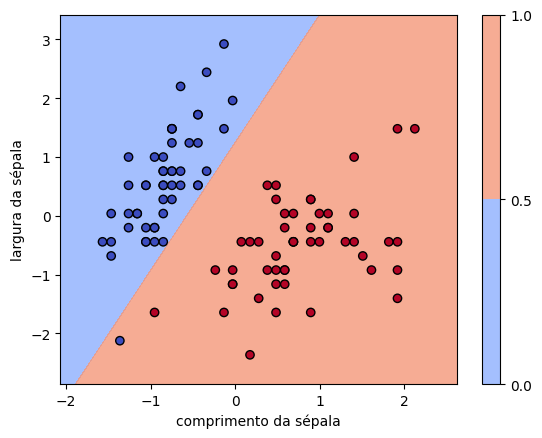

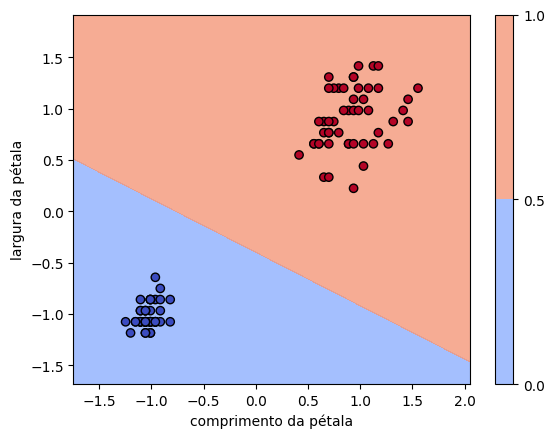

In [14]:
# Combina treino e teste para plotagem
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))


# Dados do modelo (hipotético)
weights = neuronio.pegar_pesos_bias()# Novos pesos e bias.

model_weights = np.array([ weights[0][0],  weights[0][1]])  
model_bias = weights[-1]                  
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights[0][2],  weights[0][3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, model_bias,indice_f1=2,indice_f2=3)

plt.show()

# 2 - Introdução a bilbioteca Pytorch.

# Introdução ao PyTorch 🚀

![PyTorch Logo](https://upload.wikimedia.org/wikipedia/commons/9/96/Pytorch_logo.png)

## O que é PyTorch?

PyTorch é uma biblioteca de aprendizado de máquina de código aberto desenvolvida pelo Facebook's AI Research lab (FAIR). Desde o seu lançamento, tornou-se uma das ferramentas mais populares entre os pesquisadores e engenheiros de aprendizado de máquina devido à sua flexibilidade e eficiência. PyTorch é especialmente conhecido por sua facilidade de uso e a capacidade de facilitar a prototipagem rápida.

## Para que serve PyTorch?

PyTorch serve a vários propósitos no campo do aprendizado de máquina e deep learning:

### 1. **Flexibilidade no Design de Modelos:** 💡
   - **Autograd:** PyTorch oferece um sistema dinâmico de gradiente automático (Autograd) que permite modificações flexíveis e intuitivas em grafos de computação durante a execução. Isso é particularmente útil para designs experimentais onde ajustes frequentes nos modelos são necessários.

### 2. **Facilita a Experimentação:** 🧪
   - **Simplicidade e Intuitividade:** A interface simples de usar permite que desenvolvedores e pesquisadores construam protótipos de modelos de deep learning rapidamente, o que acelera o processo de experimentação e desenvolvimento.

### 3. **Desempenho em Treinamento de Modelos:** ⚙️
   - **GPU Acceleration:** PyTorch oferece suporte extenso para aceleração via GPUs, o que torna possível o treinamento de modelos complexos de forma mais rápida. A integração com CUDA garante que o processo seja eficiente e escalável.

### 4. **Aplicações Práticas:** 🏭
   - **De Pesquisas Acadêmicas a Produção:** PyTorch não só facilita a pesquisa e o desenvolvimento acadêmico, mas também é eficaz na implementação de soluções em produção. Isso é possível graças ao TorchScript, que é uma forma de converter modelos PyTorch em formatos que podem ser otimizados para ambientes de produção.

Para mais informações, visite o [site oficial do PyTorch](https://pytorch.org/).


## 2.1 - Aprendendo a criar um perceptron.

* 1º - Importar as bibliotecas necessárias: Vamos precisar de torch para as operações tensoriais e torch.nn para as camadas e modelos de redes neurais.

* 2º - Definir a classe do Perceptron: Criaremos uma classe que herda de torch.nn.Module. Nesta classe, definiremos a camada linear (pesos e bias). Forward Pass: Definiremos o método forward que realiza a passagem direta (cálculo da saída) do perceptron.

* 3º - Inicializar o Perceptron: No construtor da classe, inicializaremos a camada linear.

In [15]:
# 1º Passo
import torch as tc
import torch.nn as nn

In [16]:
# 2ºpasso
class Perceptron(nn.Module):
    def __init__(self, input_dim):
        super(Perceptron, self).__init__()
        saida =1
        
        # Define a camada linear com input_dim entradas e 1 saída.
        self.calculo_linear = nn.Linear(input_dim, saida)
        
        # Definir a função não linear.
        self.funcao_de_ativacao = nn.Sigmoid()

    def forward(self, x):
        return self.funcao_de_ativacao(self.calculo_linear(x))

Uma parte importante dentro do perceptron é dada pela funçao "nn.Linear(input_dim, 1)".

Ela é responsavel pela parte matematica eq.(2) descrita no artigo. Para o codigo é importante saber que input_dim= é o números de entradas(em nosso problema 4) e a saida, como o propio nome indica,  é o número de saidas do perceptron.

In [17]:
X_train.shape

(80, 4)

In [18]:
# 3º passo
perceptron = Perceptron(input_dim=X_train.shape[-1])
# A dimensão do inpute deve ser igual ao numero de colunas do seu dataset
# ou igual ao número de caracteristica.
# Para o banco de dados de iris, o primeiro termo do X_train.shape
# é o numero de dados, o segundo é o número de colunas. 



Se tentamos executar o metodo forward com os data set de iris , iremos ter probremas .
Devido ao tipo dos dados

In [19]:
type(X_train)

numpy.ndarray

Precismao que o todo os dados estejam no formato da biblioteca do pytorch(tensor), portanto iremos converter as variaveis de treino e teste

In [20]:
tc.tensor(X_train[0])

tensor([ 1.8202, -0.4416,  1.4105,  0.9838], dtype=torch.float64)

In [21]:
X_train = tc.tensor(X_train, dtype=tc.float32)
X_test  = tc.tensor(X_test, dtype=tc.float32)
y_train = tc.tensor(y_train, dtype=tc.float32)
y_test  = tc.tensor(y_test, dtype=tc.float32) 

Note que foi convertido para um tipo de variavel especifico dtype=tc.float32 que é o modo padrão que as variaveis são convertidas. 

Normalmente não precisamos especificar, mas nesse caso precismos pois a variavel estão sendo convertida para dtype=tc.float64, ocupando espaço na memoria desnecessario para nosos tipo de aplicação. Portanto é um boa pratic, neste caso, restrigir o tamanho da variavel e conseguintemente liberar espaço na memoria.

In [22]:
X_train[0]

tensor([ 1.8202, -0.4416,  1.4105,  0.9838])

Com os dados convertidos para tensores, podemos inserir dentro do perceptron

In [23]:
saida = perceptron(X_train)
saida[0:5]

tensor([[0.5933],
        [0.5171],
        [0.6895],
        [0.6324],
        [0.4235]], grad_fn=<SliceBackward0>)

Naturalmente quando eu adicionar os dados de traino do arguimento do perceptron, ele já executa a metodo forward. Na celula acima estamos exibindo apenas as 5 primeira saida, referentes aos 5 primeiros valores de entrada.

In [24]:
saida.shape

torch.Size([80, 1])

Outro detalhe importante , é que a saida do perceptrontem formado [80, 1], logo o y_train deve ter o mesmo formato.
Note que

In [25]:
y_train.shape

torch.Size([80])

Para reformat iremos usar :

In [26]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

## 2.2 - Como treinar um perceptron.

Agora iremos realizar o treinamento.

Uma parte do procedimento é igual aos casos anteriores,mas temos que especifivar algus pontos cmo o otimizador e a função custo.

In [27]:
# Definir a função de perda e o otimizador
funcao_custo = nn.MSELoss()  # Erro quadrado medio
optimizer = tc.optim.Adam(perceptron.parameters(), lr=0.1)  # Otimizador gradiente Descendente Estocatico

In [28]:
# Treinar o perceptron
num_epochs = 1000  # Número de épocas para treinar
print_interval = num_epochs // 10  # Calcula o intervalo para imprimir 10 vezes
for epoch in range(num_epochs):
    # Zerar os gradientes do otimizador
    optimizer.zero_grad()

    # Forward pass: Calcular a previsão do perceptron
    outputs = perceptron(X_train)

    # Calcular a perda
    loss = funcao_custo(outputs, y_train)

    # As duas etapas seguinte são passos do backpropagation
    # Backward pass: Calcular os gradientes
    loss.backward()

    # Atualizar os pesos
    optimizer.step()

    # Printar a perda
    # Condição para imprimir a perda 10 vezes durante o treinamento
    if (epoch % print_interval == 0) or (epoch == num_epochs - 1):
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.7f}')

Epoch [1/1000], Loss: 0.3534918
Epoch [101/1000], Loss: 0.0003948
Epoch [201/1000], Loss: 0.0002507
Epoch [301/1000], Loss: 0.0001709
Epoch [401/1000], Loss: 0.0001239
Epoch [501/1000], Loss: 0.0000942
Epoch [601/1000], Loss: 0.0000741
Epoch [701/1000], Loss: 0.0000600
Epoch [801/1000], Loss: 0.0000495
Epoch [901/1000], Loss: 0.0000417
Epoch [1000/1000], Loss: 0.0000356


Vamos visualiza os resutlados 

In [29]:
# Obtenção dos pesos e bias do modelo
weights_tc = perceptron.calculo_linear.weight.data.numpy()[0]
bias_tc = perceptron.calculo_linear.bias.data.numpy()
weights_tc,bias_tc

(array([ 2.2421162, -1.4354217,  2.1282954,  2.1901395], dtype=float32),
 array([1.0112035], dtype=float32))

In [30]:
def plot_decision_boundary(X, y, model_weights, model_bias, indice_f1=0, indice_f2=1):
    """
    Plota o limite de decisão para um modelo de classificação binária junto com os dados de entrada.
    
    """
    # Definir os limites do gráfico
    x_min, x_max = X[:, indice_f1].min() - 0.5, X[:, indice_f1].max() + 0.5
    y_min, y_max = X[:, indice_f2].min() - 0.5, X[:, indice_f2].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    val = np.dot(np.c_[xx.ravel(), yy.ravel()], model_weights) + model_bias
    # Predizer para cada ponto no meshgrid
    Z = tc.sigmoid(tc.tensor(val))
    Z = Z.reshape(xx.shape)
    
    # Contorno e preenchimento
    plt.contourf(xx, yy, Z, alpha=0.8, levels=np.linspace(0, 1, 3), cmap=plt.cm.coolwarm)
    plt.colorbar()

    # Plotar os pontos de dados
    plt.scatter(X[:, indice_f1], X[:, indice_f2], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel(f'{iris.feature_names[indice_f1]}')
    plt.ylabel(f'{iris.feature_names[indice_f2]}')

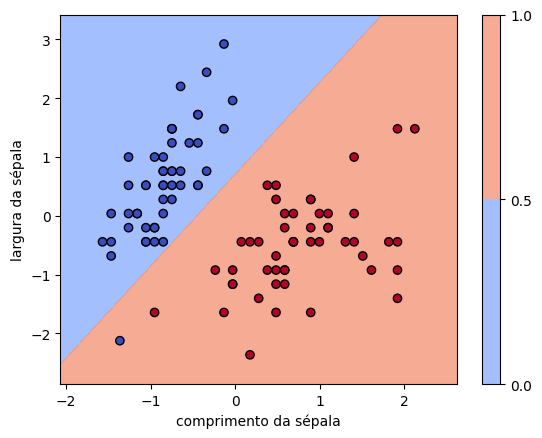

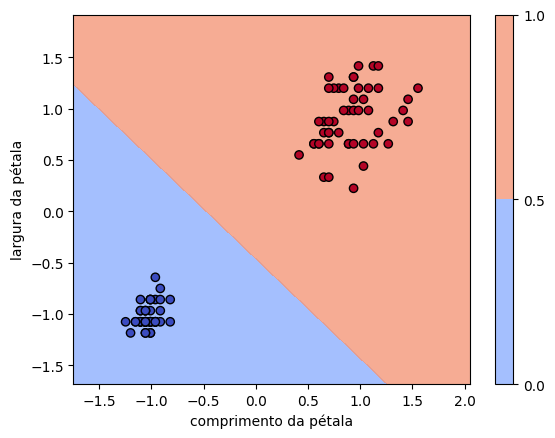

In [31]:
model_weights = np.array([ weights_tc[0],  weights_tc[1]])  
               
# Plotar a fronteira de decisão e os pontos
plot_decision_boundary(X_combined, y_combined, model_weights, bias_tc ,indice_f1=0,indice_f2=1)
plt.show()

model_weights = np.array([ weights_tc[2],  weights_tc[3]])  # Substitua por seus pesos reais
plot_decision_boundary(X_combined, y_combined, model_weights, bias_tc ,indice_f1=2,indice_f2=3)

plt.show()